<a href="https://colab.research.google.com/github/ryersonburdick/sparse_rewards_transformer_games/blob/main/notebooks/rubiks/explore_rubiks_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone GitHub repository and install required packages

In [1]:
!git clone https://github.com/ryersonburdick/sparse_rewards_transformer_games

Cloning into 'sparse_rewards_transformer_games'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 279 (delta 81), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (279/279), 7.91 MiB | 3.73 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [2]:
cd sparse_rewards_transformer_games/

/content/sparse_rewards_transformer_games


In [3]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 3.8 MB 45.1 MB/s 
     |████████████████████████████████| 503 kB 53.1 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=9e74273d37541575195ab0ce8c62ef298526e5cc5dcb657dee4089e404a9e2ef
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.7.2-py3-none-any.whl size=23620 sha256=72a6301c0d4cc676753515a3605ff7a38fb155eb6eb01d4167a6bda76613f2b8
  Stored in directory: /root/.cache/pip/wheels/f8/a0/0b/18b541426b0d966b55ae6dc35628a85f67d0698e5fabb1d6c7
Successfully built gast gpt-2-simple
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  At

Load Rubik's data

In [9]:
import re

PROMPT_START_TOKEN = "<\|startoftext\|>\[WP\]"
RESPONSE_START_TOKEN = "\[RESPONSE\]"
RESPONSE_END_TOKEN = "<\|endoftext\|>"

pair_re = re.compile(f"{PROMPT_START_TOKEN}(.*){RESPONSE_START_TOKEN}(.*){RESPONSE_END_TOKEN}")

train_path = "data/rubiks/processed/train.txt"
with open(train_path, 'r') as file:
  train_samples = [line for line in file.readlines()]

# Extract prompts and responses from training samples
prompts = []
responses = []
for sample in train_samples:
  regex = f"{PROMPT_START_TOKEN}(.*){RESPONSE_START_TOKEN}(.*){RESPONSE_END_TOKEN}"
  match = re.search(regex, sample)
  if match:
    prompts.append(match.group(1))
    responses.append(match.group(2))

response_lens_chars = [len(r) for r in responses]
response_lens_toks = [len(r.split()) for r in responses]

View distribution of response lengths

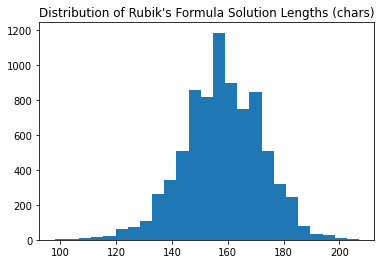

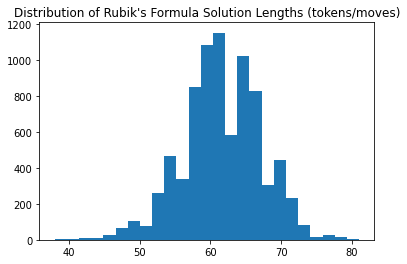

In [10]:
import matplotlib.pyplot as plt

plt.title("Distribution of Rubik's Formula Solution Lengths (chars)")
plt.hist(response_lens_chars, bins=25)
plt.show()

plt.title("Distribution of Rubik's Formula Solution Lengths (tokens/moves)")
plt.hist(response_lens_toks, bins=25)
plt.show()